# **First Digit Law:**

**Benford's Law**, which is also sometimes called the **First-Digit Law**. 

This law describes the probability distribution of the first digits of numbers in many real-world datasets. 

### **What is Benford's Law?**
Benford's Law states that in many naturally occurring datasets, the **`first digit`** of numbers is not uniformly distributed. Instead, `smaller digits (like 1, 2, or 3)` appear as the first digit more frequently than `larger digits (like 8 or 9)`.

### **Mathematical Formula**:
The probability P(d) that the first digit (d) (where ( d = 1, 2, \dots, 9 )) occurs is given by:

> `P(d) = log_10(1 + frac{1} {d})`

- Here, (log_10) is the base-10 logarithm.
- The probability decreases as the digit (d) increases.

### **Probabilities for Each First Digit**:
Using the formula, the probabilities for each first digit are:

| **First Digit (\( d \))** | **Probability \( P(d) \)** |
|---------------------------|----------------------------|
| 1                         | ( $log_{10}(2)$ approx 0.301 ) |
| 2                         | ( $log_{10}(1.5)$ approx 0.176 ) |
| 3                         | ( $log_{10}(1.overline{3})$ approx 0.125 ) |
| 4                         | ( $log_{10}(1.25)$ approx 0.097 ) |
| 5                         | ( $log_{10}(1.2)$ approx 0.079 ) |
| 6                         | ( $log_{10}(1.overline{16})$ approx 0.067 ) |
| 7                         | ( $log_{10}(1.142857)$ approx 0.058 ) |
| 8                         | ( $log_{10}(1.125)$ approx 0.051 ) |
| 9                         | ( $log_{10}(1.overline{1})$ approx 0.046 ) |

### **Key Observations**:

1. **Small Digits Are More Likely**:
   - The digit **1** appears as the first digit about **30.1%** of the time.

   - The digit **9** appears as the first digit only about **4.6%** of the time.

2. **Scale Invariance**:
   - Benford's Law is **scale-invariant**, meaning it holds true regardless of the unit of measurement (e.g., dollars, euros, meters, feet).

3. **Base Invariance**:
   - The law also applies to other number bases (e.g., binary, hexadecimal), though the probabilities change accordingly.

### **Where Does Benford's Law Apply?**
Benford's Law applies to many real-world datasets, including:
- **`Financial data`**: Stock prices, tax returns, accounting records.

- **`Natural data`**: Population numbers, river lengths, physical constants.

- **`Scientific data`**: Atomic weights, mathematical constants.

It does **not** apply to:
- Datasets with a fixed range (e.g., `human heights`).
- Artificially generated numbers (e.g., `random numbers`).

### **Why Is Benford's Law Useful?**
1. **`Fraud Detection`**:
   - If a dataset (e.g., financial records) does not follow Benford's Law, it may indicate manipulation or fraud.

2. **`Data Validation`**:
   - It helps identify errors or anomalies in datasets.

3. **`Theoretical Insight`**:
   - It provides a deeper understanding of the distribution of numbers in natural phenomena.

### **Example**:
Suppose you analyze the first digits of the populations of all countries. According to Benford's Law:
- About **`30.1%`** of the populations will start with the digit **`1`**.
- About **`4.6%`** of the populations will start with the digit **`9`**.

### **Key Takeaways**:
- Benford's Law predicts the distribution of first digits in many real-world datasets.

- Smaller digits (1, 2, 3) are more likely to appear as the first digit than larger digits (8, 9).

- It is widely used in fraud detection, data validation, and theoretical studies.

----
----
----

## **First Digit Law Verification:**

1. **Create Synthetic Data**:
   - Generate random numbers that do **not** follow Benford's Law (e.g., uniformly distributed numbers).

   - Compare this with a dataset that **does** follow Benford's Law (e.g., numbers generated using a logarithmic distribution).

2. **Analyze the First Digits**:
   - Extract the first digit of each number in the dataset.

   - Compare the distribution of first digits to the probabilities predicted by Benford's Law.

3. **Visualize the Results**:
   - Use **Matplotlib** to plot the observed distribution of first digits against the expected distribution from Benford's Law.

4. **Use Machine Learning (Optional)**:
   - Use **scikit-learn** to train a classifier to distinguish between synthetic and real data based on the first-digit distribution.

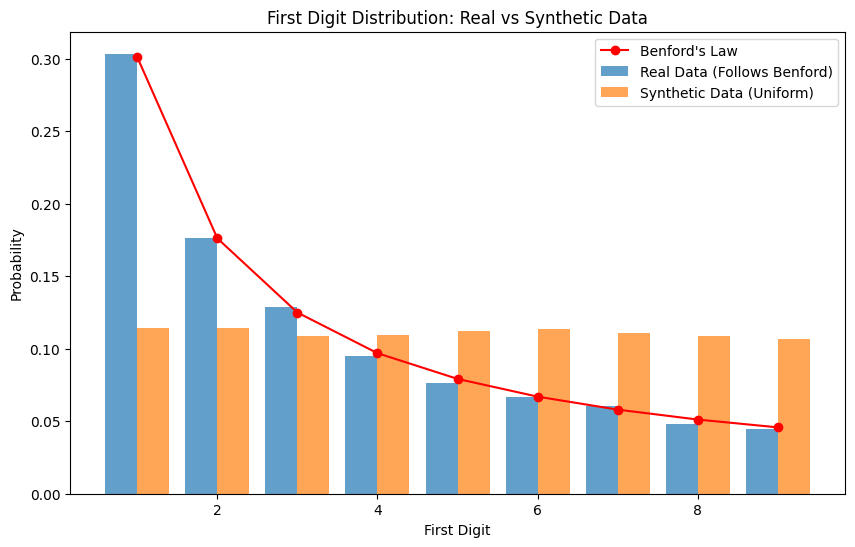

Classifier Accuracy: 0.64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create Synthetic Data
def generate_synthetic_data(size, follow_benford=True):
    if follow_benford:
        # Generate numbers following Benford's Law (logarithmic distribution)
        digits = np.arange(1, 10)
        probabilities = np.log10(1 + 1 / digits)
        probabilities /= probabilities.sum()  # Normalize to ensure sum = 1
        first_digits = np.random.choice(digits, size=size, p=probabilities)
        numbers = first_digits * 10 ** np.random.uniform(0, 3, size=size)  # Random magnitude
    else:
        # Generate uniformly random numbers (does not follow Benford's Law)
        numbers = np.random.uniform(1, 10000, size=size)
    return numbers

# Generate datasets
real_data = generate_synthetic_data(10000, follow_benford=True)
synthetic_data = generate_synthetic_data(10000, follow_benford=False)

# Step 2: Extract First Digits
def extract_first_digit(numbers):
    return np.floor(numbers / 10 ** np.floor(np.log10(numbers))).astype(int)

real_first_digits = extract_first_digit(real_data)
synthetic_first_digits = extract_first_digit(synthetic_data)

# Step 3: Compare Distributions
def benford_probability(d):
    return np.log10(1 + 1 / d)

digits = np.arange(1, 10)
benford_probs = np.array([benford_probability(d) for d in digits])

# Count observed frequencies
real_counts = np.bincount(real_first_digits, minlength=10)[1:]
synthetic_counts = np.bincount(synthetic_first_digits, minlength=10)[1:]

# Normalize to probabilities
real_probs = real_counts / real_counts.sum()
synthetic_probs = synthetic_counts / synthetic_counts.sum()

# Step 4: Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(digits - 0.2, real_probs, width=0.4, label="Real Data (Follows Benford)", alpha=0.7)
plt.bar(digits + 0.2, synthetic_probs, width=0.4, label="Synthetic Data (Uniform)", alpha=0.7)
plt.plot(digits, benford_probs, 'ro-', label="Benford's Law")
plt.xlabel("First Digit")
plt.ylabel("Probability")
plt.title("First Digit Distribution: Real vs Synthetic Data")
plt.legend()
plt.show()

# Step 5: Use Machine Learning to Distinguish (Optional)
# Create a dataset with labels
X_real = pd.get_dummies(pd.Series(real_first_digits)).values
X_synthetic = pd.get_dummies(pd.Series(synthetic_first_digits)).values
X = np.vstack([X_real, X_synthetic])
y = np.array([0] * len(real_first_digits) + [1] * len(synthetic_first_digits))  # 0 = real, 1 = synthetic

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier Accuracy: {accuracy:.2f}")

1. **Synthetic Data Generation**:
   - `generate_synthetic_data` creates two datasets:
     - One that follows Benford's Law (using a logarithmic distribution).
     - One that does not follow Benford's Law (using a uniform distribution).

2. **First Digit Extraction**:
   - The `extract_first_digit` function extracts the first digit of each number.

3. **Distribution Comparison**:
   - The observed distribution of first digits is compared to the theoretical distribution from Benford's Law.

4. **Visualization**:
   - A bar chart shows the distribution of first digits for both datasets, along with the expected distribution from Benford's Law.

5. **Machine Learning (Optional)**:
   - A Random Forest classifier is trained to distinguish between real and synthetic data based on the first-digit distribution.

### **Output**:
1. **Plot**:
   - The plot will show that the real data closely follows Benford's Law, while the synthetic data does not.

2. **Classifier Accuracy**:
   - The classifier will have high accuracy in distinguishing between real and synthetic data based on the first-digit distribution.

### **Key Takeaways**:
- Synthetic data that does not follow Benford's Law can be easily identified by comparing its first-digit distribution to the expected distribution.

- This technique is useful for detecting anomalies, fraud, or synthetic data in real-world datasets.